In [1]:
import numpy as np # linear algebra
import json
import cv2
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import SVC
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib


In [4]:
clf=joblib.load("train_model.m")

ModuleNotFoundError: No module named 'joblib'

In [3]:
clf=joblib.load("train_model.m")
face_cascade=cv2.CascadeClassifier('Haarcascades_Datasets/haarcascade_frontalface_default.xml')#copy the locations


img = cv2.imread("test/"+"test5.png")
img_length=80
ppc=16

ModuleNotFoundError: No module named 'joblib'

In [11]:

if type(img) is np.ndarray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      
        rm = cv2.resize(img,(img_length,img_length))

In [24]:
face_cascade=cv2.CascadeClassifier('Haarcascades_Datasets/haarcascade_frontalface_default.xml')#copy the locations

In [22]:
def predCropped(img):
    if type(img) is np.ndarray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      
        rm = cv2.resize(img,(img_length,img_length))
    
    data_gray = color.rgb2gray(rm) 
    fd,hog_image = hog(data_gray, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    hog_feature = np.array(fd)
    y=clf.predict(hog_feature.reshape(1,-1)) #此处test_X为特征集
    ######y[o]是预测结果 the result is y[0]
    #-----区间等于y[0]
    
    result="predicted age is :"+str(y[0]*10)+" ~ "+str(y[0]*10+9)
    return(result)
    
    # plt.imshow(data_gray)
    



In [91]:
def predGrayCropped(img):
    if type(img) is np.ndarray:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      
        rm = cv2.resize(img,(img_length,img_length))
    
#     data_gray = color.rgb2gray(rm) 
    data_gray=rm
    fd,hog_image = hog(data_gray, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    hog_feature = np.array(fd)
    y=clf.predict(hog_feature.reshape(1,-1)) #此处test_X为特征集
    ######y[o]是预测结果 the result is y[0]
    #-----区间等于y[0]
    
    result="predicted age is :"+str(y[0]*10)+" ~ "+str(y[0]*10+9)
    result=y[0]
    return(result)




In [57]:
def FaceFindWholePic(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:

                    #in face
                    cv2.rectangle(img,(x,y),(x+w,y+h),(255,218,185),3)

                    #extracting the facial part
                    roi_gray = gray[y:y+h, x:x+w]

                    roi_color = img[y:y+h, x:x+w]
                    simg = cv2.resize(roi_gray,(80,80))
                    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    return (roi_gray)


In [122]:
def AgePredictInWholePicuture(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:

                    #in face
                    cv2.rectangle(img,(x,y),(x+w,y+h),(255,218,185),3)

                    #extracting the facial part
                    roi_gray = gray[y:y+h, x:x+w]

                    roi_color = img[y:y+h, x:x+w]
#                     simg = cv2.resize(roi_gray,(80,80))
    ageP=predGrayCropped(roi_gray)
    cv2.putText(img, "%s" % str(ageP*10)+"~"+str(ageP*10+9),(x-4 , y-4), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 255), 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    pass
#     return (roi_gray)


In [121]:
def AgePredictInWholePicutureReal(img):#real-time from camera 没有BGR2RGB
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:

                    #in face
                    cv2.rectangle(img,(x,y),(x+w,y+h),(255,218,185),3)

                    #extracting the facial part
                    roi_gray = gray[y:y+h, x:x+w]

                    roi_color = img[y:y+h, x:x+w]
                    simg = cv2.resize(roi_gray,(80,80))
    ageP=predGrayCropped(roi_gray)
    cv2.putText(img, "%s" % str(ageP*10)+"~"+str(ageP*10+9),(x-4 , y-4), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 255), 1)

    
    return(img)
#     return (roi_gray)


In [126]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(len(faces))

1


In [120]:
if cap.isOpened():
    while 1 :
        
        #reading the frame
        ret, img=cap.read()

        AgePredictInWholePicuture(img)

        #displaying the image
        cv2.imshow('img',img)
        
        
        
        #wait key
        k = cv2.waitKey(30) & 0xff
        if k == 27:
                break

NameError: name 'cap' is not defined

In [4]:

img = cv2.imread("test/"+"test4.png")
AgePredictInWholePicuture(img)

NameError: name 'cv2' is not defined

/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


2.0

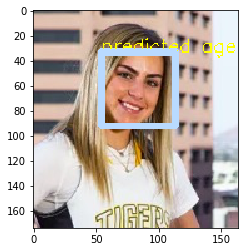

In [94]:
predGrayCropped(FaceFindWholePic(img))

In [23]:
predCropped(img)


/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


'predicted age is :10.0 ~ 19.0'

In [12]:

data_gray = color.rgb2gray(rm) 
fd,hog_image = hog(data_gray, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
# plt.imshow(data_gray)



/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


In [1]:
# hog_feature = np.array(fd)
# hog_feature.reshape(1, -1)

In [53]:
hog_feature.shape

(512,)

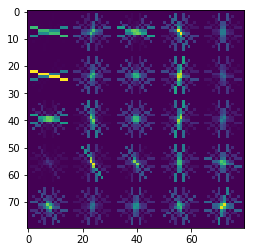

In [54]:
plt.imshow(hog_image)

In [56]:
y=clf.predict(hog_feature.reshape(1,-1)) #此处test_X为特征集
print(y)

[1.]


In [3]:
# plt.imshow(img)